Загрузка необходимых библиотек 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import pointbiserialr, spearmanr, chi2_contingency, kruskal, mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import spearmanr

Выявление взаимосвязи между продолжительностью образования и количеством баллов, набранных по шкале MoCA в группе с синдромом МКС и в группе при здоровом когнитивном старении 


Проверка нормальности для группы MCI:
MoCA: статистика = 0.882, p = 0.000
Образование: статистика = 0.969, p = 0.020

Проверка нормальности для группы Control:
MoCA: статистика = 0.861, p = 0.000
Образование: статистика = 0.953, p = 0.001

Спирмен корреляция в группе MCI:
Коэффициент = 0.243, p-value = 0.0149

Спирмен корреляция в группе Control:
Коэффициент = -0.061, p-value = 0.5496


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


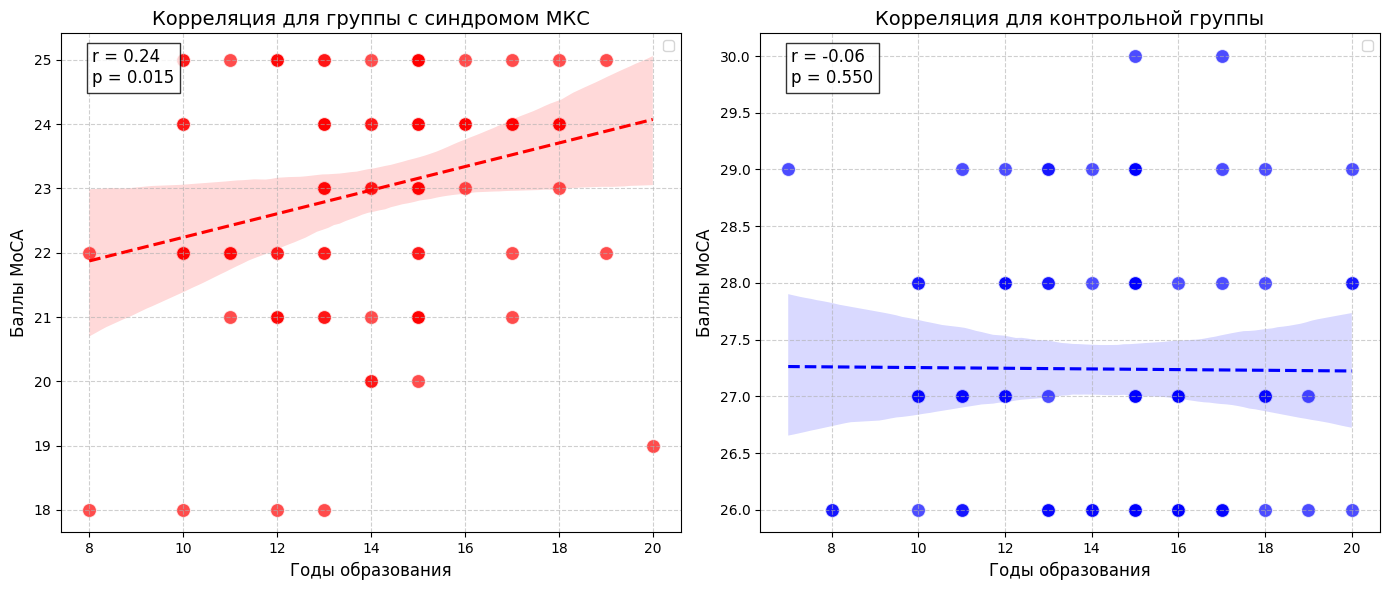

In [11]:
# 1. Загрузка данных
mci_data = pd.read_csv("edu&MoCa_MCI.csv")
control_data = pd.read_csv("edu&MoCa_control.csv")

def check_normality(df, group_name):
    print(f"\nПроверка нормальности для группы {group_name}:")
    # Проверка для баллов MoCA
    stat, p = shapiro(df['moca_score'])
    print(f'MoCA: статистика = {stat:.3f}, p = {p:.3f}')
    # Проверка для лет образования
    stat, p = shapiro(df['education'])
    print(f'Образование: статистика = {stat:.3f}, p = {p:.3f}')


def calculate_nonparametric_corr(df, group_name):
    corr, p_value = spearmanr(df['education'], df['moca_score'])
    print(f"\nСпирменовская корреляция в группе {group_name}:")
    print(f"ρ = {corr:.3f}, p-value = {p_value:.4f}")
    return corr, p_value

# 2. Проверка нормальности распределения
check_normality(mci_data, "MCI")
check_normality(control_data, "Control")

# 3. Расчет корреляции в зависимости от нормальности
def calculate_appropriate_correlation(df, group_name):
    # Проверка нормальности для MoCA и образования
    _, p_moca = shapiro(df['moca_score'])
    _, p_edu = shapiro(df['education'])
    
    if p_moca > 0.05 and p_edu > 0.05:
        corr, p_value = pearsonr(df['moca_score'], df['education'])
        method = "Пирсон"
    else:
        corr, p_value = spearmanr(df['education'], df['moca_score'])
        method = "Спирмен"
    
    print(f"\n{method} корреляция в группе {group_name}:")
    print(f"Коэффициент = {corr:.3f}, p-value = {p_value:.4f}")
    return corr, p_value, method

corr_mci, p_mci, method_mci = calculate_appropriate_correlation(mci_data, "MCI")
corr_control, p_control, method_control = calculate_appropriate_correlation(control_data, "Control")

# 4. Визуализация (аналогично вашему коду, с добавлением метода в заголовок)

# 4. Создаем фигуру с двумя субплoтами
plt.figure(figsize=(14, 6))

# График для MCI группы
plt.subplot(1, 2, 1)
sns.scatterplot(data=mci_data, x='education', y='moca_score', 
               color='red', s=100, alpha=0.7)
sns.regplot(data=mci_data, x='education', y='moca_score', 
           scatter=False, color='red', line_kws={'linestyle':'--'})

plt.title('Корреляция для группы с синдромом МКС', fontsize=14)
plt.xlabel('Годы образования', fontsize=12)
plt.ylabel('Баллы MoCA', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.text(0.05, 0.9, f'r = {corr_mci:.2f}\np = {p_mci:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend()

# График для контрольной группы
plt.subplot(1, 2, 2)
sns.scatterplot(data=control_data, x='education', y='moca_score', 
               color='blue', s=100, alpha=0.7)
sns.regplot(data=control_data, x='education', y='moca_score', 
           scatter=False, color='blue', line_kws={'linestyle':'--'})

plt.title('Корреляция для контрольной группы', fontsize=14)
plt.xlabel('Годы образования', fontsize=12)
plt.ylabel('Баллы MoCA', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.text(0.05, 0.9, f'r = {corr_control:.2f}\np = {p_control:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend()

plt.tight_layout()
plt.show()

# 5. Сохранение графиков (раскомментируйте при необходимости)
# plt.savefig('correlation_plots.png', dpi=300, bbox_inches='tight')

Выявление взаимосвязи между возрастом и количеством баллов, набранных по шкале MoCA в группе с синдромом МКС и в группе при здоровом когнитивном старении 

MCI группа:
       moca_score         age
count  100.000000  100.000000
mean    22.990000   73.200000
std      1.806246    7.449493
min     18.000000   58.000000
25%     22.000000   67.750000
50%     23.500000   73.000000
75%     24.000000   79.000000
max     25.000000   88.000000

Контрольная группа:
       moca_score         age
count  100.000000  100.000000
mean    27.240000   69.500000
std      1.138136    5.409494
min     26.000000   53.000000
25%     26.000000   66.000000
50%     27.000000   69.000000
75%     28.000000   73.000000
max     30.000000   87.000000

Проверка нормальности для группы MCI:
MoCA: статистика = 0.882, p = 0.000
Возраст: статистика = 0.971, p = 0.028

Проверка нормальности для группы Control:
MoCA: статистика = 0.861, p = 0.000
Возраст: статистика = 0.967, p = 0.013

Спирмен корреляция в группе MCI:
Коэффициент = -0.198, p-value = 0.0485

Спирмен корреляция в группе Control:
Коэффициент = -0.155, p-value = 0.1234


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


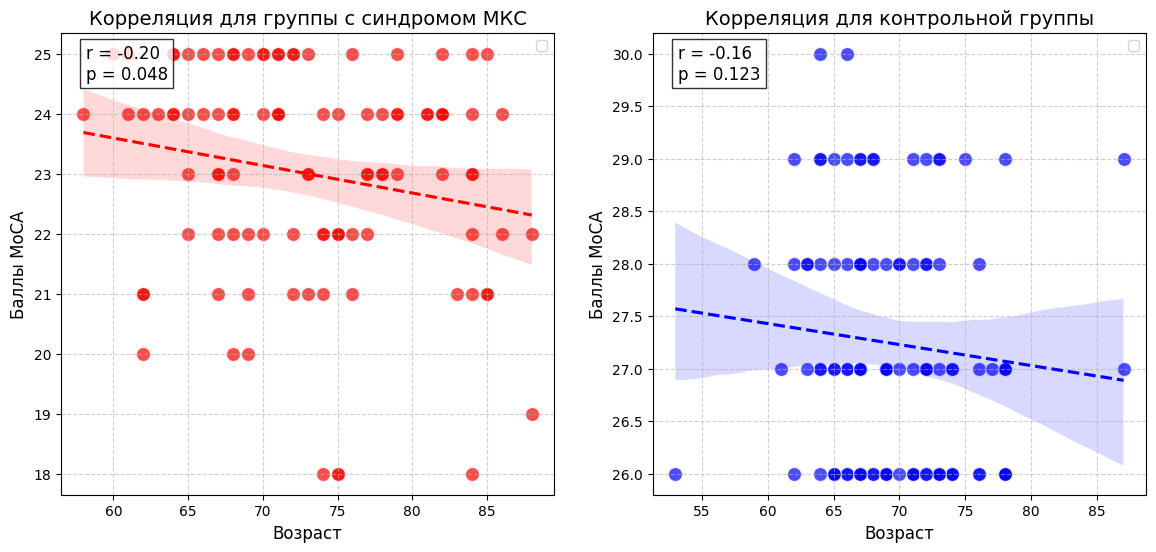

In [12]:
# Загрузка данных
mci_data = pd.read_csv("age&MoCa_MCI.csv")
control_data = pd.read_csv("age&MoCa_control.csv")

# 2. Проверка данных
print("MCI группа:")
print(mci_data.describe())
print("\nКонтрольная группа:")
print(control_data.describe())

# Функция для проверки нормальности
def check_normality(df, group_name):
    print(f"\nПроверка нормальности для группы {group_name}:")
    # Проверка для баллов MoCA
    stat, p = shapiro(df['moca_score'])
    print(f'MoCA: статистика = {stat:.3f}, p = {p:.3f}')
    # Проверка для возраста
    stat, p = shapiro(df['age'])
    print(f'Возраст: статистика = {stat:.3f}, p = {p:.3f}')

# Проверка нормальности распределения
check_normality(mci_data, "MCI")
check_normality(control_data, "Control")

# Функция для расчета корреляции с учетом нормальности
def calculate_appropriate_correlation(df, group_name):
    # Проверка нормальности для MoCA и возраста
    _, p_moca = shapiro(df['moca_score'])
    _, p_age = shapiro(df['age'])
    
    if p_moca > 0.05 and p_age > 0.05:
        corr, p_value = pearsonr(df['moca_score'], df['age'])
        method = "Пирсон"
    else:
        corr, p_value = spearmanr(df['moca_score'], df['age'])
        method = "Спирмен"
    
    print(f"\n{method} корреляция в группе {group_name}:")
    print(f"Коэффициент = {corr:.3f}, p-value = {p_value:.4f}")
    return corr, p_value, method

# Расчет корреляции для каждой группы
corr_mci, p_mci, method_mci = calculate_appropriate_correlation(mci_data, "MCI")
corr_control, p_control, method_control = calculate_appropriate_correlation(control_data, "Control")

# Визуализация
plt.figure(figsize=(14, 6))

# График для MCI группы
plt.subplot(1, 2, 1)
sns.scatterplot(data=mci_data, x='age', y='moca_score', 
               color='red', s=100, alpha=0.7)
sns.regplot(data=mci_data, x='age', y='moca_score', 
           scatter=False, color='red', line_kws={'linestyle':'--'})

plt.title('Корреляция для группы с синдромом МКС', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Баллы MoCA', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.text(0.05, 0.9, f'r = {corr_mci:.2f}\np = {p_mci:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend()

# График для контрольной группы
plt.subplot(1, 2, 2)
sns.scatterplot(data=control_data, x='age', y='moca_score', 
               color='blue', s=100, alpha=0.7)
sns.regplot(data=control_data, x='age', y='moca_score', 
           scatter=False, color='blue', line_kws={'linestyle':'--'})

plt.title('Корреляция для контрольной группы', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Баллы MoCA', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.text(0.05, 0.9, f'r = {corr_control:.2f}\np = {p_control:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend()

plt.tight_layout
plt.show()

# 5. Сохранение графиков (раскомментируйте при необходимости)
# plt.savefig('correlation_plots.png', dpi=300, bbox_inches='tight')

Выявление взаимосвязи между 

1) количеством баллов, набранным по шкале HADS-D для оценки депрессивных проявлений и количеством баллов, набранных по шкале MoCA; 

2)количеством баллов, набранным по шкале HADS-A для оценки тревожных проявлений и количеством баллов, набранных по шкале MoCA;

3) количеством баллов, набранным по шкале HADS-D для оценки депрессивных проявлений и количеством стресогенных ситуаций за последние 5 лет; 

4)количеством баллов, набранным по шкале HADS-A для оценки тревожных проявлений и количеством стресогенных ситуаций за последние 5 лет; 

5) количеством баллов, набранным по шкале HADS-D для оценки депрессивных проявлений и эмоциональной тональностью дискурсов;

6)количеством баллов, набранным по шкале HADS-A для оценки тревожных проявлений и эмоциональной тональностью дискурсов; 

7)количеством баллов, набранным по шкале MoCA и эмоциональной тональностью дискурсов; 

8) количеством баллов, набранным по шкале MoCA и количеством речевых маркеров, указывающих на нарушения в работе памяти; 

9) количеством баллов, набранным по шкале MoCA и количеством хезитаций в дискурсе; 

10) количеством баллов, набранным по шкале HADS-D для оценки депрессивных проявлений и количеством речевых маркеров, указывающих на нарушения в работе памяти;

11) количеством баллов, набранным по шкале HADS-D для оценки депрессивных проявлений и количеством хезитаций в дискурсе; 

12) количеством баллов, набранным по шкале HADS-A для оценки тревожных проявлений и количеством речевых маркеров, указывающих на нарушения в работе памяти; 

13) количеством баллов, набранным по шкале HADS-A для оценки тревожных проявлений и количеством хезитаций в дискурсе; в группе пациентов с синдромом МКС и в группе участников при здоровом когнитивном старении. 


=== Проверка нормальности для группы MCI ===
moca_score: статистика = 0.882, p = 0.0000 (не нормальное)
anxiety (HADS): статистика = 0.957, p = 0.0027 (не нормальное)
depression (HADS): статистика = 0.955, p = 0.0018 (не нормальное)
memory_complaints: статистика = 0.452, p = 0.0000 (не нормальное)
hesitations : статистика = 0.909, p = 0.0000 (не нормальное)

=== Проверка нормальности для группы Control ===
moca_score: статистика = 0.861, p = 0.0000 (не нормальное)
anxiety (HADS): статистика = 0.970, p = 0.0240 (не нормальное)
depression (HADS): статистика = 0.949, p = 0.0007 (не нормальное)
memory_complaints: статистика = 0.383, p = 0.0000 (не нормальное)
hesitations : статистика = 0.971, p = 0.0271 (не нормальное)


=== Анализ для группы: MCI ===

Корреляции с MoCA (ρ):
MoCA ↔ Уровень депрессии: ρ = -0.20, p = 0.0465 *
MoCA ↔ Уровень тревожности: ρ = 0.02, p = 0.8792 

Корреляции HADS ↔ Стресс (rpb):
Депрессия ↔ Стресс: rpb = 0.03, p = 0.8017 
Тревожность ↔ Стресс: rpb = 0.05, p = 0.

/tmp/ipykernel_163/3317764818.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='level_depression', y='moca_score',
/tmp/ipykernel_163/3317764818.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='level_anxiety', y='moca_score',
/tmp/ipykernel_163/3317764818.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment_text', y='moca_score',
/tmp/ipykernel_163/3317764818.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

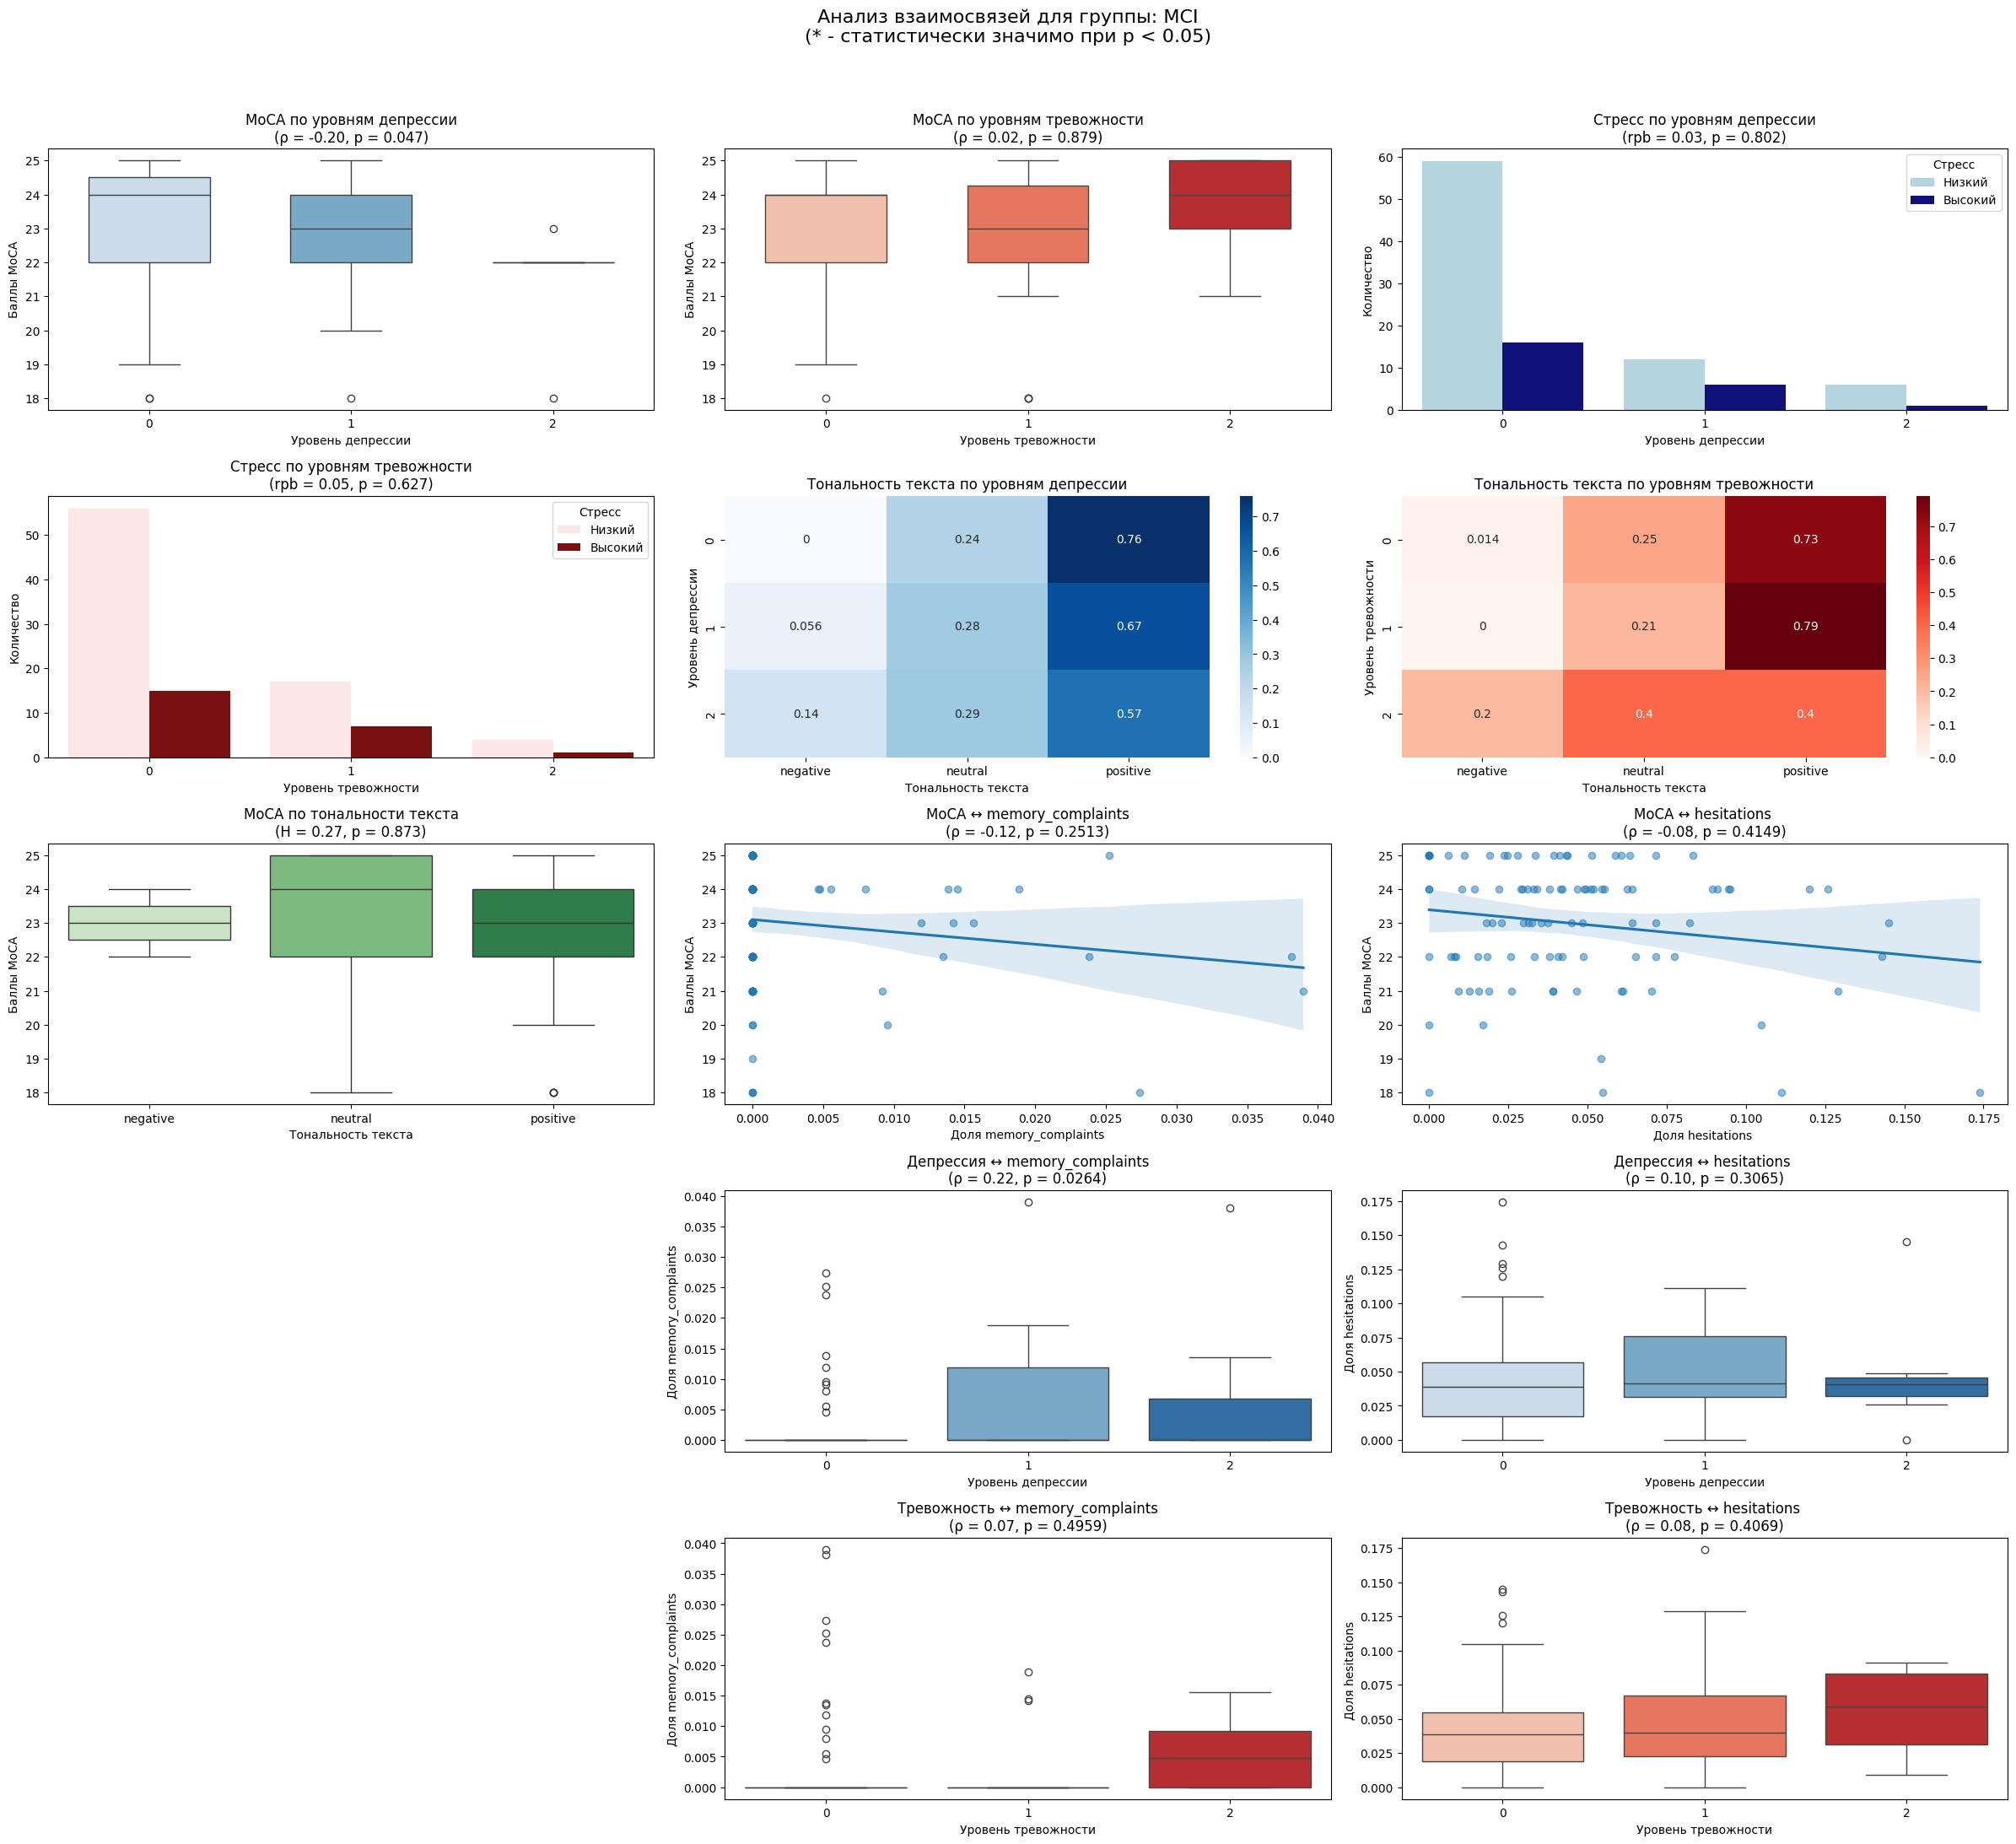

/tmp/ipykernel_163/3317764818.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='level_depression', y='moca_score',
/tmp/ipykernel_163/3317764818.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='level_anxiety', y='moca_score',
/tmp/ipykernel_163/3317764818.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment_text', y='moca_score',
/tmp/ipykernel_163/3317764818.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

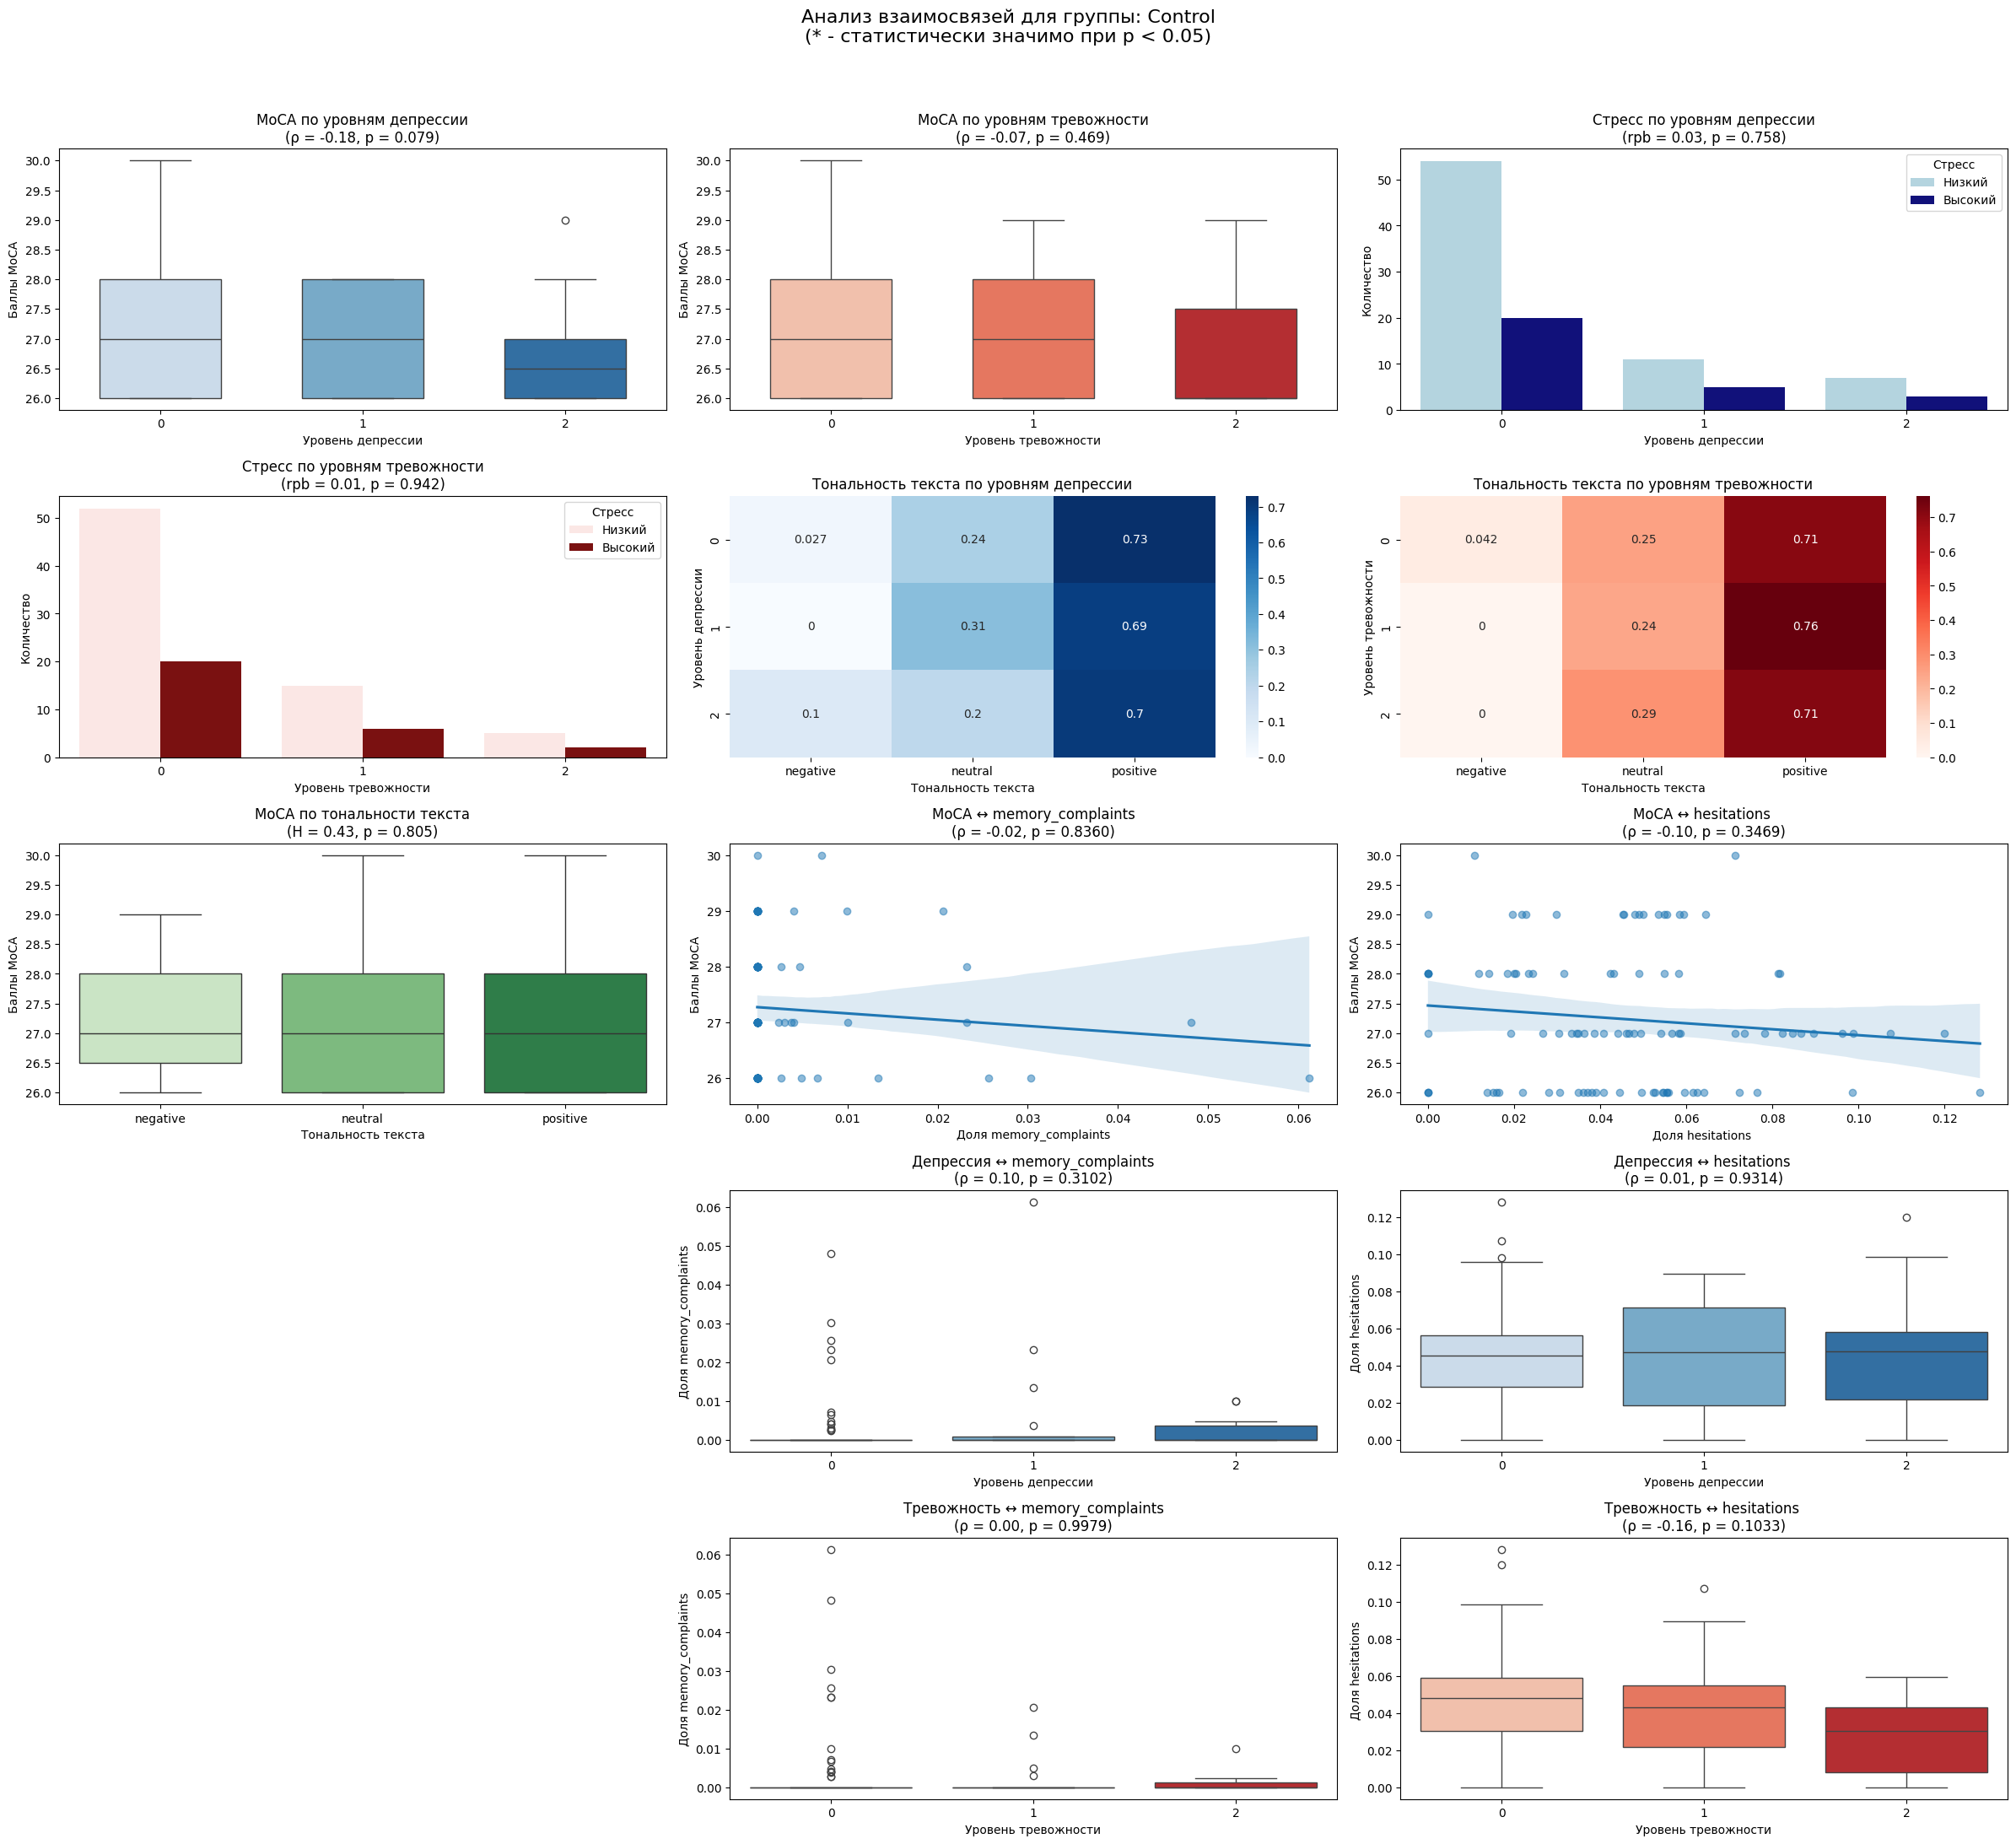



=== Сравнение групп MCI vs Control ===

moca_score:
MCI: Mdn=23.5, IQR=22.0-24.0
Control: Mdn=27.0, IQR=26.0-28.0
U-тест: U=0.0, p=0.0000 *

anxiety (HADS):
MCI: Mdn=5.0, IQR=2.75-8.0
Control: Mdn=6.0, IQR=3.0-8.0
U-тест: U=4705.5, p=0.4707 

depression (HADS):
MCI: Mdn=5.0, IQR=3.0-7.25
Control: Mdn=5.0, IQR=3.0-8.0
U-тест: U=4919.0, p=0.8431 

memory_complaints:
MCI: Mdn=0.0, IQR=0.0-0.0
Control: Mdn=0.0, IQR=0.0-0.0
U-тест: U=4905.0, p=0.7385 

hesitations :
MCI: Mdn=0.03908836261777435, IQR=0.01914005805515235-0.06073232323232323
Control: Mdn=0.0457157784743991, IQR=0.0240297713981924-0.0584796063311688
U-тест: U=4619.0, p=0.3523 

level_depression:
col_0     0   1   2
row_0              
Control  74  16  10
MCI      75  18   7
χ²=0.65, p=0.7212 

binar_stress:
col_0     0   1
row_0          
Control  72  28
MCI      77  23
χ²=0.42, p=0.5164 

sentiment_text:
col_0    negative  neutral  positive
row_0                               
Control         3       25        72
MCI        

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, spearmanr, pointbiserialr, kruskal, mannwhitneyu, chi2_contingency

# Загрузка данных
mci_data = pd.read_csv("depression&sentiment_MCI.csv")
control_data = pd.read_csv("depression&sentiment_control.csv")

# Функция для проверки нормальности
def check_normality(df, group_name):
    print(f"\n=== Проверка нормальности для группы {group_name} ===")
    numeric_cols = ['moca_score', 'anxiety (HADS)', 'depression (HADS)', 
                   'memory_complaints','hesitations ']
    for col in numeric_cols:
        stat, p = shapiro(df[col])
        print(f"{col}: статистика = {stat:.3f}, p = {p:.4f} {'(нормальное)' if p > 0.05 else '(не нормальное)'}")

# Проверка нормальности распределения
check_normality(mci_data, "MCI")
check_normality(control_data, "Control")

# Функция для расчета корреляций с проверкой значимости
def calculate_correlations(df, group_name):
    print(f"\n\n=== Анализ для группы: {group_name} ===")
    
    results = {}
    
    # 1. Корреляции с MoCA (порядковые переменные - используем Спирмена)
    corr_moca_dep, p_moca_dep = spearmanr(df['moca_score'], df['level_depression'])
    corr_moca_anx, p_moca_anx = spearmanr(df['moca_score'], df['level_anxiety'])
    
    print(f"\nКорреляции с MoCA (ρ):")
    print(f"MoCA ↔ Уровень депрессии: ρ = {corr_moca_dep:.2f}, p = {p_moca_dep:.4f} {'*' if p_moca_dep < 0.05 else ''}")
    print(f"MoCA ↔ Уровень тревожности: ρ = {corr_moca_anx:.2f}, p = {p_moca_anx:.4f} {'*' if p_moca_anx < 0.05 else ''}")

    # 2. Корреляции HADS со стрессом (бинарные - используем точечно-биссериальную)
    corr_dep_stress, p_dep_stress = pointbiserialr(df['level_depression'], df['binar_stress'])
    corr_anx_stress, p_anx_stress = pointbiserialr(df['level_anxiety'], df['binar_stress'])
    
    print(f"\nКорреляции HADS ↔ Стресс (rpb):")
    print(f"Депрессия ↔ Стресс: rpb = {corr_dep_stress:.2f}, p = {p_dep_stress:.4f} {'*' if p_dep_stress < 0.05 else ''}")
    print(f"Тревожность ↔ Стресс: rpb = {corr_anx_stress:.2f}, p = {p_anx_stress:.4f} {'*' if p_anx_stress < 0.05 else ''}")

    # 3. Корреляции HADS с тональностью (порядковые vs номинальные - используем Краскела-Уоллиса)
    print(f"\nКорреляции HADS ↔ Тональность:")
    for var in ['level_depression', 'level_anxiety']:
        groups = [df[df['sentiment_text'] == cat][var] for cat in ['negative', 'neutral', 'positive']]
        h_stat, p_val = kruskal(*groups)
        print(f"{var.split('_')[1].capitalize()} ↔ Тональность: H = {h_stat:.2f}, p = {p_val:.4f} {'*' if p_val < 0.05 else ''}")

    # 4. Корреляции MoCA с тональностью (используем Краскела-Уоллиса)
    print(f"\nКорреляции MoCA ↔ Тональность:")
    groups = [df[df['sentiment_text'] == cat]['moca_score'] for cat in ['negative', 'neutral', 'positive']]
    h_stat, p_val = kruskal(*groups)
    print(f"MoCA ↔ Тональность: H = {h_stat:.2f}, p = {p_val:.4f} {'*' if p_val < 0.05 else ''}")
    
    # 5. Новые корреляции: MoCA с речевыми маркерами
    print(f"\nКорреляции MoCA ↔ Речевые маркеры (ρ):")
    for marker in ['memory_complaints', 'hesitations ']:
        corr, p = spearmanr(df['moca_score'], df[marker])
        print(f"MoCA ↔ {marker}: ρ = {corr:.2f}, p = {p:.4f} {'*' if p < 0.05 else ''}")
        results[f'moca_{marker}'] = (corr, p)
    
    # 6. Корреляции депрессии с речевыми маркерами
    print(f"\nКорреляции Депрессия ↔ Речевые маркеры (ρ):")
    for marker in ['memory_complaints', 'hesitations ']:
        corr, p = spearmanr(df['level_depression'], df[marker])
        print(f"Депрессия ↔ {marker}: ρ = {corr:.2f}, p = {p:.4f} {'*' if p < 0.05 else ''}")
        results[f'dep_{marker}'] = (corr, p)
    
    # 7. Корреляции тревожности с речевыми маркерами
    print(f"\nКорреляции Тревожность ↔ Речевые маркеры (ρ):")
    for marker in ['memory_complaints', 'hesitations ']:
        corr, p = spearmanr(df['level_anxiety'], df[marker])
        print(f"Тревожность ↔ {marker}: ρ = {corr:.2f}, p = {p:.4f} {'*' if p < 0.05 else ''}")
        results[f'anx_{marker}'] = (corr, p)
    
    # Сохраняем все результаты
    results.update({
        'group': group_name,
        'moca_dep': (corr_moca_dep, p_moca_dep),
        'moca_anx': (corr_moca_anx, p_moca_anx),
        'dep_stress': (corr_dep_stress, p_dep_stress),
        'anx_stress': (corr_anx_stress, p_anx_stress),
        'moca_sentiment': (h_stat, p_val)
    })
    
    return results

# Расчет корреляций
results_mci = calculate_correlations(mci_data, "MCI")
results_control = calculate_correlations(control_data, "Control")

# Визуализация с добавлением информации о значимости
def plot_correlations(df, group_name, results):
    plt.figure(figsize=(24, 25))
    plt.suptitle(f'Анализ взаимосвязей для группы: {group_name}\n(* - статистически значимо при p < 0.05)', 
                 y=1.02, fontsize=16)
    
    # 1. MoCA vs Уровни HADS
    plt.subplot(6, 3, 1)
    sns.boxplot(data=df, x='level_depression', y='moca_score', 
                order=[0, 1, 2], palette='Blues', width=0.6)
    plt.title(f'MoCA по уровням депрессии\n(ρ = {results["moca_dep"][0]:.2f}, p = {results["moca_dep"][1]:.3f})')
    plt.xlabel('Уровень депрессии')
    plt.ylabel('Баллы MoCA')
    
    plt.subplot(6, 3, 2)
    sns.boxplot(data=df, x='level_anxiety', y='moca_score', 
                order=[0, 1, 2], palette='Reds', width=0.6)
    plt.title(f'MoCA по уровням тревожности\n(ρ = {results["moca_anx"][0]:.2f}, p = {results["moca_anx"][1]:.3f})')
    plt.xlabel('Уровень тревожности')
    plt.ylabel('Баллы MoCA')
    
    # 2. HADS vs Стресс
    plt.subplot(6, 3, 3)
    sns.countplot(data=df, x='level_depression', hue='binar_stress', 
                 order=[0, 1, 2], palette=['lightblue', 'darkblue'])
    plt.title(f'Стресс по уровням депрессии\n(rpb = {results["dep_stress"][0]:.2f}, p = {results["dep_stress"][1]:.3f})')
    plt.xlabel('Уровень депрессии')
    plt.ylabel('Количество')
    plt.legend(title='Стресс', labels=['Низкий', 'Высокий'])
    
    plt.subplot(6, 3, 4)
    sns.countplot(data=df, x='level_anxiety', hue='binar_stress', 
                 order=[0, 1, 2], palette=['mistyrose', 'darkred'])
    plt.title(f'Стресс по уровням тревожности\n(rpb = {results["anx_stress"][0]:.2f}, p = {results["anx_stress"][1]:.3f})')
    plt.xlabel('Уровень тревожности')
    plt.ylabel('Количество')
    plt.legend(title='Стресс', labels=['Низкий', 'Высокий'])
    
    # 3. HADS vs Тональность
    plt.subplot(6, 3, 5)
    sns.heatmap(pd.crosstab(df['level_depression'], df['sentiment_text'], 
                            normalize='index'), annot=True, cmap='Blues')
    plt.title('Тональность текста по уровням депрессии')
    plt.xlabel('Тональность текста')
    plt.ylabel('Уровень депрессии')
    
    plt.subplot(6, 3, 6)
    sns.heatmap(pd.crosstab(df['level_anxiety'], df['sentiment_text'], 
                normalize='index'), annot=True, cmap='Reds')
    plt.title('Тональность текста по уровням тревожности')
    plt.xlabel('Тональность текста')
    plt.ylabel('Уровень тревожности')
    
    # 4. MoCA vs Тональность
    plt.subplot(6, 3, 7)
    sns.boxplot(data=df, x='sentiment_text', y='moca_score', 
               order=['negative', 'neutral', 'positive'], palette='Greens')
    plt.title(f'MoCA по тональности текста\n(H = {results["moca_sentiment"][0]:.2f}, p = {results["moca_sentiment"][1]:.3f})')
    plt.xlabel('Тональность текста')
    plt.ylabel('Баллы MoCA')
    
    # 5. Новые графики: MoCA vs Речевые маркеры
    for i, marker in enumerate(['memory_complaints', 'hesitations '], start=8):
        plt.subplot(6, 3, i)
        sns.regplot(x=marker, y='moca_score', data=df, scatter_kws={'alpha':0.5})
        corr, p = results[f'moca_{marker}']
        plt.title(f'MoCA ↔ {marker}\n(ρ = {corr:.2f}, p = {p:.4f})')
        plt.xlabel(f'Доля {marker}')
        plt.ylabel('Баллы MoCA')
    
    # 6. Депрессия vs Речевые маркеры
    for i, marker in enumerate(['memory_complaints','hesitations '], start=11):
        plt.subplot(6, 3, i)
        sns.boxplot(x='level_depression', y=marker, data=df, 
                   order=[0, 1, 2], palette='Blues')
        corr, p = results[f'dep_{marker}']
        plt.title(f'Депрессия ↔ {marker}\n(ρ = {corr:.2f}, p = {p:.4f})')
        plt.xlabel('Уровень депрессии')
        plt.ylabel(f'Доля {marker}')
    
    # 7. Тревожность vs Речевые маркеры
    for i, marker in enumerate(['memory_complaints', 'hesitations '], start=14):
        plt.subplot(6, 3, i)
        sns.boxplot(x='level_anxiety', y=marker, data=df, 
                   order=[0, 1, 2], palette='Reds')
        corr, p = results[f'anx_{marker}']
        plt.title(f'Тревожность ↔ {marker}\n(ρ = {corr:.2f}, p = {p:.4f})')
        plt.xlabel('Уровень тревожности')
        plt.ylabel(f'Доля {marker}')
    
    plt.tight_layout()
    plt.show()

# Построение графиков
plot_correlations(mci_data, "MCI", results_mci)
plot_correlations(control_data, "Control", results_control)

# Сравнение групп (MCI vs Control) с проверкой значимости
def compare_groups(mci, control):
    print("\n\n=== Сравнение групп MCI vs Control ===")
    
    # 1. Сравнение количественных переменных
    quant_vars = ['moca_score', 'anxiety (HADS)', 'depression (HADS)', 
                 'memory_complaints', 'hesitations ']
    for var in quant_vars:
        stat, p = mannwhitneyu(mci[var], control[var])
        print(f"\n{var}:")
        print(f"MCI: Mdn={mci[var].median()}, IQR={mci[var].quantile(0.25)}-{mci[var].quantile(0.75)}")
        print(f"Control: Mdn={control[var].median()}, IQR={control[var].quantile(0.25)}-{control[var].quantile(0.75)}")
        print(f"U-тест: U={stat:.1f}, p={p:.4f} {'*' if p < 0.05 else ''}")
    
    # 2. Сравнение категориальных переменных
    cat_vars = ['level_depression', 'binar_stress', 'sentiment_text']
    for var in cat_vars:
        table = pd.crosstab(np.concatenate([['MCI']*len(mci), ['Control']*len(control)]), 
                           np.concatenate([mci[var], control[var]]))
        chi2, p, dof, expected = chi2_contingency(table)
        print(f"\n{var}:")
        print(table)
        print(f"χ²={chi2:.2f}, p={p:.4f} {'*' if p < 0.05 else ''}")

compare_groups(mci_data, control_data)

In [17]:
print("Столбцы в MCI данных:", mci_data.columns.tolist())
print("Столбцы в контрольных данных:", control_data.columns.tolist())

Столбцы в MCI данных: ['file_name', 'anxiety (HADS)', 'level_anxiety', 'depression (HADS)', 'level_depression', 'sentiment_text', 'moca_score', 'stress_situations', 'binar_stress', 'memory_complaints', 'lexical_access', 'hesitations ']
Столбцы в контрольных данных: ['file_name', 'anxiety (HADS)', 'level_anxiety', 'depression (HADS)', 'level_depression', 'sentiment_text', 'moca_score', 'stress_situations', 'binar_stress', 'memory_complaints', 'lexical_access', 'hesitations ']
